# Simulating a Real-World Phenomenon - Irish Discrimination Rates

Explain

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# 2014 Ratio: https://www.cso.ie/en/releasesandpublications/er/q-eq/qnhsequalitymodulequarter32014/

total_disc_yes = 0.12

# Of 12% Yes
M = 630
F = 1069
T = M + F

# Estimate Total Survey Size
total_survey = int(round(T / 0.12))
print("Estimated Total Survey Size: ", total_survey)


M_Y = (M/total_survey)
F_Y = (F/total_survey)

M_R = (M/total_survey)*100
F_R = (F/total_survey)*100

print("Percentage of Males who felt discriminated against: ", M_R)
print("Percentage of Females who felt discriminated against: ",F_R)

Estimated Total Survey Size:  14158
Percentage of Males who felt discriminated against:  4.449781042520129
Percentage of Females who felt discriminated against:  7.550501483260348


In [69]:
# Set Array
sex_x = ['Male', 'Female']
disc_x = ['M_Y', 'F_Y', 'M_N', 'F_N']
discrim_type = ['Gender', 'Marital Status', 'Family Status', 'Age', 'Disability', 'Race', 'Other']


# Assume 50% Males and 50% Females
M_N = 0.5 - M_Y
F_N = 0.5 - F_Y

# Set Discrimination Types %
gen_x = 9
mar_x = 3
fam_x = 9
age_x = 24
dis_x = 6
rac_x = 21
oth_x = 41

# As Multiple Responses were allowed in the Survey, add weighting to correct %
tot_disc = gen_x + mar_x + fam_x + age_x + dis_x +  rac_x + oth_x

gen_x = gen_x/tot_disc
mar_x = mar_x/tot_disc
fam_x = fam_x/tot_disc
age_x = age_x/tot_disc
dis_x = dis_x/tot_disc
rac_x = rac_x/tot_disc
oth_x = oth_x/tot_disc

# Build Dataframe
sex = np.random.choice(sex_x, total_survey, p=[0.5, 0.5])
disc = np.random.choice(disc_x, total_survey, p=[M_Y, F_Y, M_N, F_N])

df=pd.DataFrame(data={'Sex': sex, 'Discriminated Against': disc})
df ['Discriminated Against'].replace({'M_Y':'Yes', 'M_N':'No', 'F_Y':'Yes', 'F_N':'No'}, inplace=True)


print(df.head(10))

# Split Dataframe
disc_yes =  df['Discriminated Against']=='Yes'
df_yes = df[disc_yes]

disc_no =  df['Discriminated Against']=='No'
df_no = df[disc_no]

yes_count_x = df_yes['Discriminated Against']
yes_count = yes_count_x.count()


print(df_yes.head(10))

type_disc = np.random.choice(discrim_type, yes_count, p=[gen_x, mar_x, fam_x, age_x, dis_x, rac_x, oth_x])

df_no['Type'] = 'NA'
df_yes['Type'] = type_disc


print(df_yes.head(10))
print(df.head(10))

# Join Dataframes
frames = [df_no, df_yes]

result = pd.concat(frames)
print(result)

  Discriminated Against     Sex
0                    No  Female
1                    No    Male
2                    No    Male
3                    No  Female
4                    No    Male
5                    No  Female
6                    No    Male
7                    No    Male
8                    No  Female
9                    No  Female
    Discriminated Against     Sex
28                    Yes    Male
30                    Yes  Female
38                    Yes  Female
54                    Yes  Female
99                    Yes  Female
105                   Yes    Male
119                   Yes  Female
120                   Yes  Female
128                   Yes  Female
133                   Yes  Female
    Discriminated Against     Sex           Type
28                    Yes    Male     Disability
30                    Yes  Female  Family Status
38                    Yes  Female           Race
54                    Yes  Female  Family Status
99                    Yes  Fe

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


       Discriminated Against     Sex   Type
count                  14158   14158  14158
unique                     2       2      8
top                       No  Female     NA
freq                   12459    7091  12459


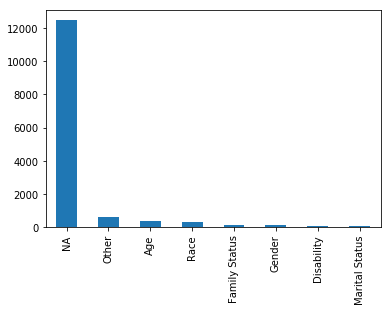

In [74]:
print(result.describe())

result['Type'].value_counts().plot(kind='bar')